# Imtiaz Mall Sales Analysis Report
# (waslah Nisar)
## Introduction

Imtiaz Mall, a renowned department store chain, is experiencing declining sales and a
significant number of non-recurring customers in its electronics section. To address this
challenge, you, the newly appointed Senior Data Scientist, have been tasked with conducting a
comprehensive analysis of the electronics section data and developing data-driven strategies for
customer retention and sales growth. This project focuses on the initial steps of this analysis,
specifically exploring the data through various techniques and comparing the results of three
clustering algorithms: K-Means, DBSCAN, and K-Means++.



# Module : Data Acquisition and Preprocessing

## 1. Data Acquisition:

First of all we import the libraries such as pandas, json, numpy and read data from file.

In [280]:
import pandas as pd
import json
import numpy as np


df = pd.read_json('electronics.json')
df



,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,,70,Male,Medium,"566 Butler Turnpike\nPort Holly, OK 22329",776be313-5308-468e-a0ed-7409a4303364,2023-03-17,1802f115-80d8-48fd-ad97-94038fe31b82,Electronics,Brand_C,180,92,2,5,Medium,05,1987,Fall
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176,53,3,3,Medium,09,1977,Winter
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,Hidden,8b6ffec8-de54-445c-90d0-1399858b2e16,Hidden,Brand_C,212,99,2,9,Low,12,1995,Summer
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,Hidden,98,8,7,Low,03,2000,


## 2. Data Cleaning:

The data cleaning process involves several key steps to ensure the reliability and consistency of the dataset. Now we start data cleaning process we have dataset which have some empty values and Hidden values in data. First we replace hidden values in data with NAN. and then we replace empty values with NAN.

In [281]:
df.replace('Hidden', np.nan, inplace=True)
df.replace("", np.nan, inplace=True)
df


,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,NaN,25,Male,High,NaN,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,NaN,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,70,Male,Medium,"566 Butler Turnpike\nPort Holly, OK 22329",776be313-5308-468e-a0ed-7409a4303364,2023-03-17,1802f115-80d8-48fd-ad97-94038fe31b82,Electronics,Brand_C,180,92,2,5,Medium,05,1987,Fall
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176,53,3,3,Medium,09,1977,Winter
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,NaN,8b6ffec8-de54-445c-90d0-1399858b2e16,NaN,Brand_C,212,99,2,9,Low,12,1995,Summer
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,NaN,98,8,7,Low,03,2000,NaN


#### Now we check the total  null values in all columns

In [282]:
null_values_count = df.isnull().sum()

print("Null Values per Column:")
print(null_values_count)

Null Values per Column:
Customer_ID                      44
Age                              40
Gender                           48
Income_Level                     50
Address                          47
Transaction_ID                   50
Purchase_Date                    48
Product_ID                       49
Product_Category                 60
Brand                            58
Purchase_Amount                  49
Average_Spending_Per_Purchase    40
Purchase_Frequency_Per_Month     55
Brand_Affinity_Score             61
Product_Category_Preferences     43
Month                            53
Year                             52
Season                           48
dtype: int64


In [283]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

mean_age = df['Age'].mean()

df['Age'] = df['Age'].fillna(round(mean_age)).astype(int)


In [284]:
mode_inc = df['Income_Level'].mode()[0]
df['Income_Level'].fillna(mode_inc, inplace=True)


mode_inc = df['Gender'].mode()[0]
df['Gender'].fillna(mode_inc, inplace=True)

In [285]:
mode_add = df['Address'].mode()[0]
df['Address'].fillna(mode_add, inplace=True)

In [286]:
mode_pr = df['Purchase_Date'].mode()[0]
df['Purchase_Date'].fillna(mode_pr, inplace=True)

In [287]:
mode_Product_Category = df['Product_Category'].mode()[0]
df['Product_Category'].fillna(mode_Product_Category, inplace=True)

In [288]:
mode_Brand  = df['Brand'].mode()[0]
df['Brand'].fillna(mode_Brand , inplace=True)

In [289]:
df['Purchase_Amount'] = pd.to_numeric(df['Purchase_Amount'], errors='coerce')
mean_purchase_amount = df['Purchase_Amount'].mean()
df['Purchase_Amount'].fillna(mean_purchase_amount, inplace=True)
df['Purchase_Amount'] = df['Purchase_Amount'].astype(int)


In [290]:
df['Average_Spending_Per_Purchase'] = pd.to_numeric(df['Average_Spending_Per_Purchase'], errors='coerce')
mean_purchase_amount = df['Average_Spending_Per_Purchase'].mean()
df['Average_Spending_Per_Purchase'].fillna(mean_purchase_amount, inplace=True)
df['Average_Spending_Per_Purchase'] = df['Average_Spending_Per_Purchase'].astype(int)


In [291]:
df['Purchase_Frequency_Per_Month'] = pd.to_numeric(df['Purchase_Frequency_Per_Month'], errors='coerce')

median_Purchase_Frequency_Per_Month = df['Purchase_Frequency_Per_Month'].mean()
df['Purchase_Frequency_Per_Month'].fillna(median_Purchase_Frequency_Per_Month, inplace=True)

df['Purchase_Frequency_Per_Month'] = df['Purchase_Frequency_Per_Month'].astype(int)


In [292]:
df['Brand_Affinity_Score'] = pd.to_numeric(df['Brand_Affinity_Score'], errors='coerce')

median_brand_affinity_score = df['Brand_Affinity_Score'].mean()
df['Brand_Affinity_Score'].fillna(median_brand_affinity_score, inplace=True)

df['Brand_Affinity_Score'] = df['Brand_Affinity_Score'].astype(int)


In [293]:
mode_product_category = df['Product_Category_Preferences'].mode()[0]
df['Product_Category_Preferences'].fillna(mode_product_category, inplace=True)


In [294]:
mode_month = df['Month'].mode()[0]
mode_year = df['Year'].mode()[0]
mode_season = df['Season'].mode()[0]
mode_cus = df['Customer_ID'].mode()[0]
mode_trans = df['Transaction_ID'].mode()[0]
mode_product = df['Product_ID'].mode()[0]


df['Month'].fillna(mode_month, inplace=True)
df['Year'].fillna(mode_year, inplace=True)
df['Season'].fillna(mode_season, inplace=True)
df['Customer_ID'].fillna(mode_cus, inplace=True)
df['Transaction_ID'].fillna(mode_trans, inplace=True)
df['Product_ID'].fillna(mode_product, inplace=True)



In [295]:
# Analyze outliers in 'Age' column
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

outliers_age = df[(df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age)]
print("Potential Outliers in 'Age' column:")
print(outliers_age[['Age']])

Potential Outliers in 'Age' column:
Empty DataFrame
Columns: [Age]
Index: []


In [296]:
# Analyze outliers in 'Purchase_Amount' column
Q1_purchase = df['Purchase_Amount'].quantile(0.25)
Q3_purchase = df['Purchase_Amount'].quantile(0.75)
IQR_purchase = Q3_purchase - Q1_purchase

lower_bound_purchase = Q1_purchase - 1.5 * IQR_purchase
upper_bound_purchase = Q3_purchase + 1.5 * IQR_purchase

outliers_purchase = df[(df['Purchase_Amount'] < lower_bound_purchase) | (df['Purchase_Amount'] > upper_bound_purchase)]
print("\nPotential Outliers in 'Purchase_Amount' column:")
print(outliers_purchase[['Purchase_Amount']])



Potential Outliers in 'Purchase_Amount' column:
Empty DataFrame
Columns: [Purchase_Amount]
Index: []


In [297]:
#Description: Represents the total spending of each customer, taking into account both the purchase amount and frequency.
df['Total_Spending'] = df['Purchase_Amount'] * df['Purchase_Frequency_Per_Month']


#Combines information about the preferred brand and product category for each customer.
df['Preferred_Brand_Category'] = df['Brand'] + '_' + df['Product_Category']

#Identifies customers with significantly higher than average spending. Binary indicator (1 for high spender, 0 otherwise).
average_spending = df['Purchase_Amount'].mean()
df['High_Spending_Customers'] = (df['Purchase_Amount'] > average_spending).astype(int)


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    1000 non-null   object
 1   Age                            1000 non-null   int32 
 2   Gender                         1000 non-null   object
 3   Income_Level                   1000 non-null   object
 4   Address                        1000 non-null   object
 5   Transaction_ID                 1000 non-null   object
 6   Purchase_Date                  1000 non-null   object
 7   Product_ID                     1000 non-null   object
 8   Product_Category               1000 non-null   object
 9   Brand                          1000 non-null   object
 10  Purchase_Amount                1000 non-null   int32 
 11  Average_Spending_Per_Purchase  1000 non-null   int32 
 12  Purchase_Frequency_Per_Month   1000 non-null   int32 
 13  Bran

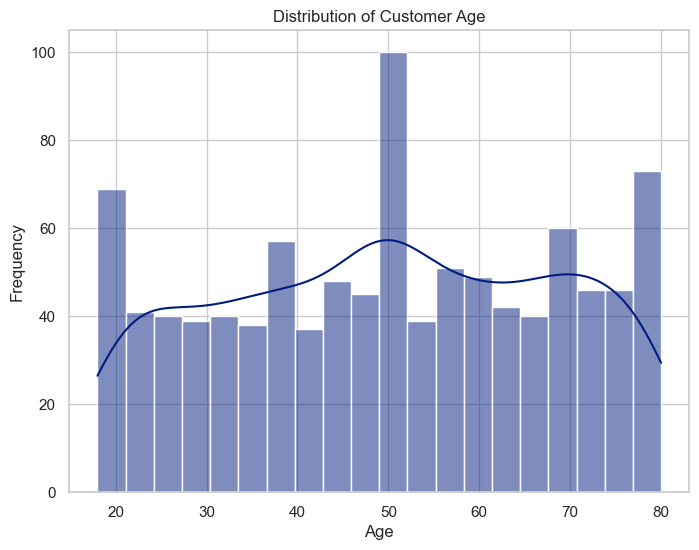

In [299]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette
sns.set(style="whitegrid", palette="dark")

# Histogram for customer age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=False)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

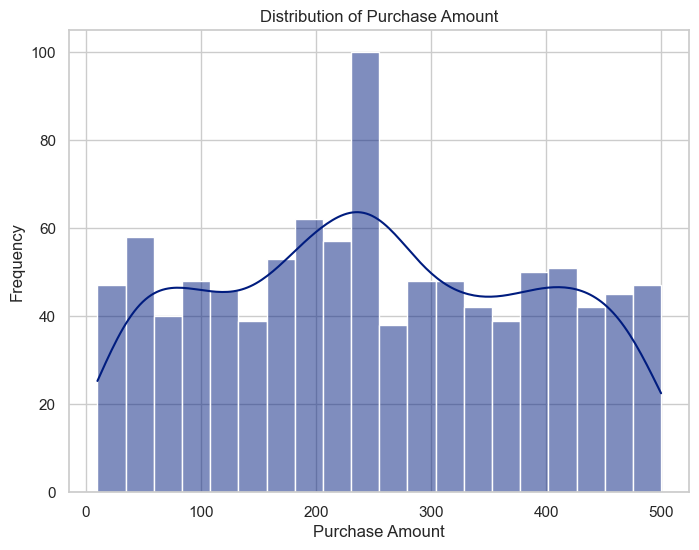

In [300]:
# Histogram for purchase amount
plt.figure(figsize=(8, 6))
sns.histplot(df['Purchase_Amount'], bins=20, kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

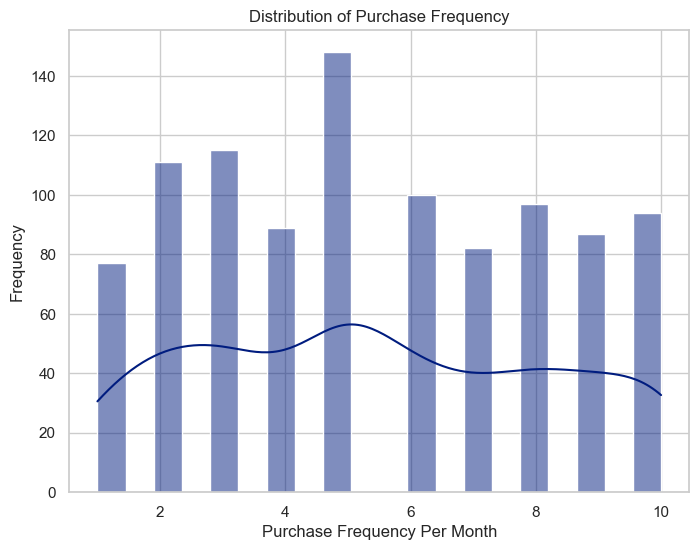

In [301]:
# Histogram for purchase frequency
plt.figure(figsize=(8, 6))
sns.histplot(df['Purchase_Frequency_Per_Month'], bins=20, kde=True)
plt.title('Distribution of Purchase Frequency')
plt.xlabel('Purchase Frequency Per Month')
plt.ylabel('Frequency')
plt.show()

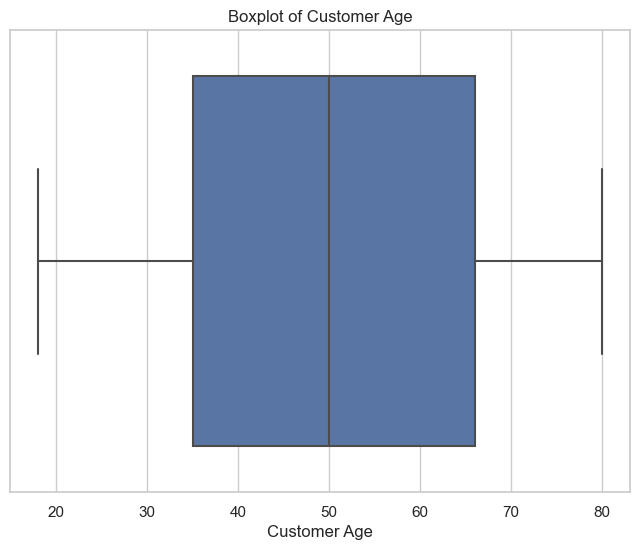

In [302]:
# Set the style and color palette
sns.set(style="whitegrid", palette="deep")

# Boxplot for customer age
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Customer Age')
plt.xlabel('Customer Age')
plt.show()

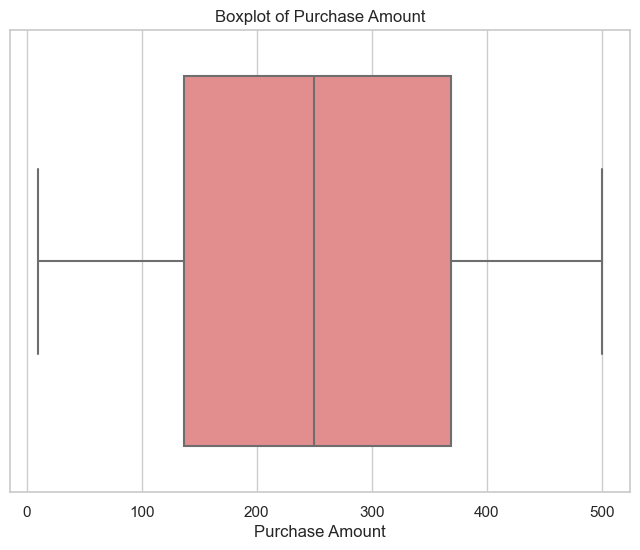

In [303]:
# 2. Boxplot for Purchase Amount
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Purchase_Amount'], color='lightcoral')
plt.title('Boxplot of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.show()

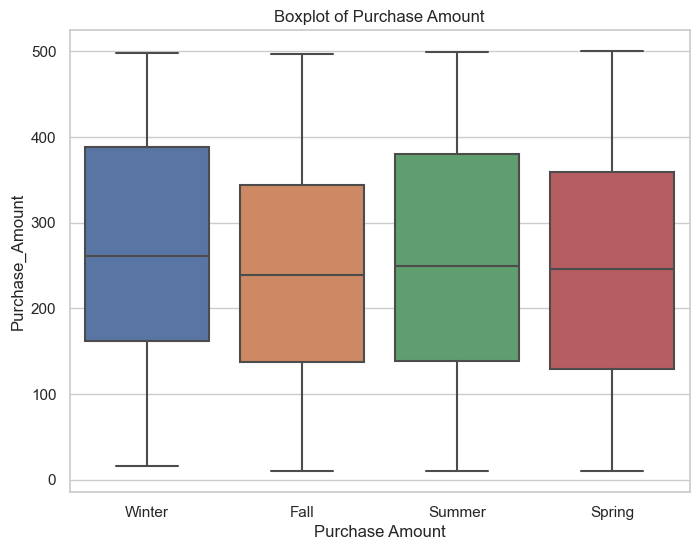

In [304]:
# Boxplot for purchase amount wrt seasons
plt.figure(figsize=(8, 6))
sns.boxplot(x='Season', y='Purchase_Amount', data=df)
plt.title('Boxplot of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.show()

In [305]:
import pandas as pd
import plotly.express as px


age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']


df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


age_group_stats = df.groupby('Age_Group').agg({
    'Purchase_Amount': 'sum',
    'Average_Spending_Per_Purchase': 'mean',
    'Purchase_Frequency_Per_Month': 'sum'
}).reset_index()



plt.figure(figsize=(8, 6))
sns.set(style="whitegrid", palette="pastel")
fig = px.bar(age_group_stats, x='Age_Group', y='Purchase_Amount', title='Total Purchase Amount by Age Group')
fig.show()


<Figure size 800x600 with 0 Axes>

# module 2 part 2

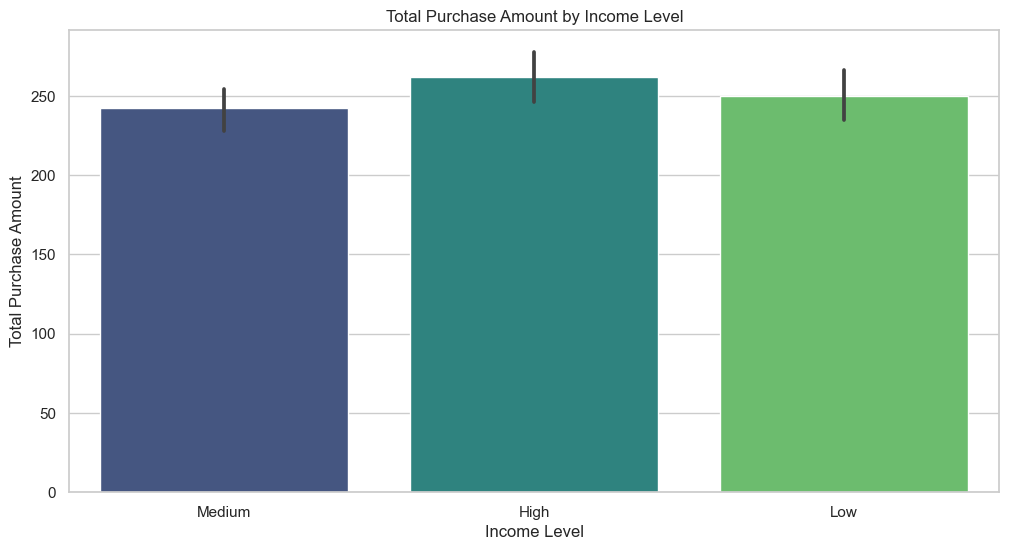

In [306]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(12, 6))
sns.barplot(x='Income_Level', y='Purchase_Amount', data=df, palette='viridis')
plt.title('Total Purchase Amount by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Total Purchase Amount')
plt.show()


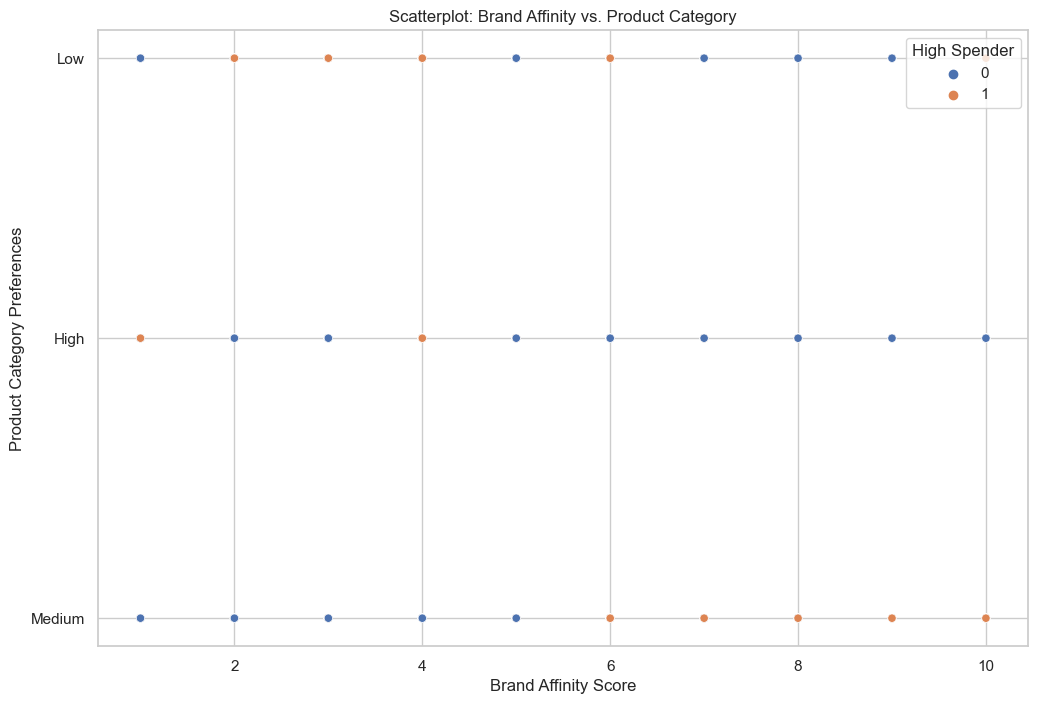

In [307]:
# 2. Scatterplot: Brand Affinity vs. Product Category
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Brand_Affinity_Score', y='Product_Category_Preferences', data=df, hue='High_Spending_Customers', palette='deep')
plt.title('Scatterplot: Brand Affinity vs. Product Category')
plt.xlabel('Brand Affinity Score')
plt.ylabel('Product Category Preferences')
plt.legend(title='High Spender', loc='upper right')
plt.show()


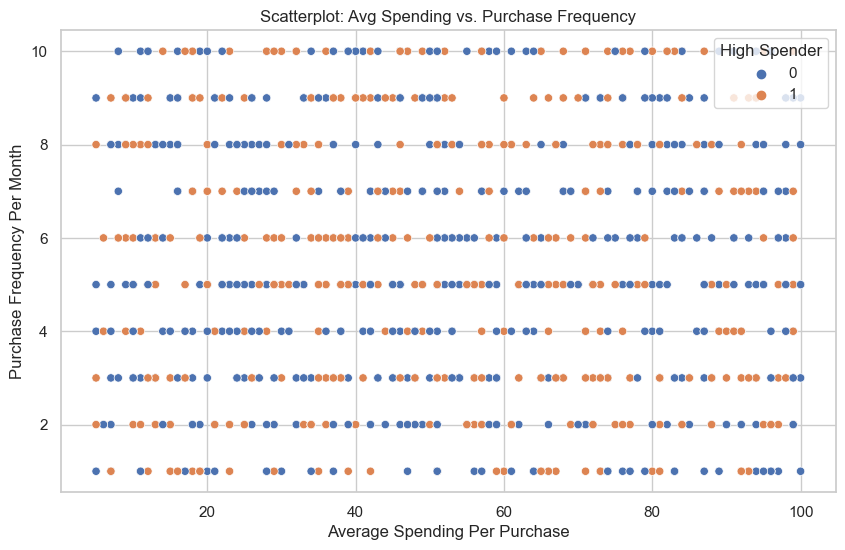

In [308]:
sns.set(style="whitegrid", palette="pastel")

# Scatterplot: Average Spending Per Purchase vs. Purchase Frequency Per Month
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_Spending_Per_Purchase', y='Purchase_Frequency_Per_Month', data=df, hue='High_Spending_Customers', palette='deep')
plt.title('Scatterplot: Avg Spending vs. Purchase Frequency')
plt.xlabel('Average Spending Per Purchase')
plt.ylabel('Purchase Frequency Per Month')
plt.legend(title='High Spender', loc='upper right')
plt.show()


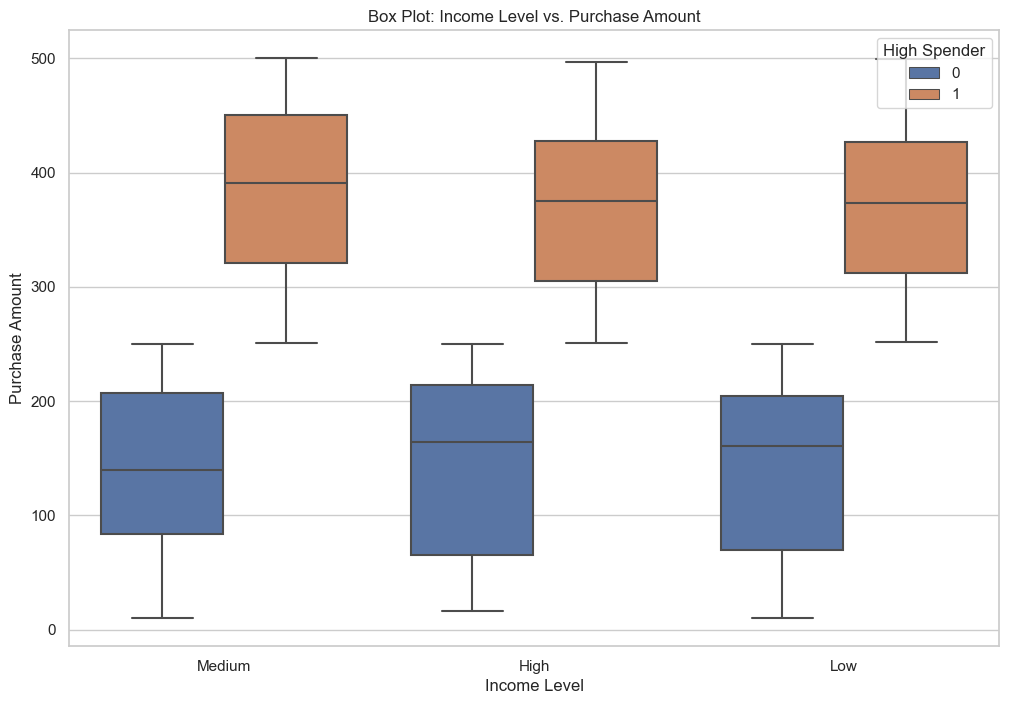

In [309]:
# Box Plot: Income Level vs. Purchase Amount
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income_Level', y='Purchase_Amount', data=df, hue='High_Spending_Customers', palette='deep')
plt.title('Box Plot: Income Level vs. Purchase Amount')
plt.xlabel('Income Level')
plt.ylabel('Purchase Amount')
plt.legend(title='High Spender', loc='upper right')
plt.show()

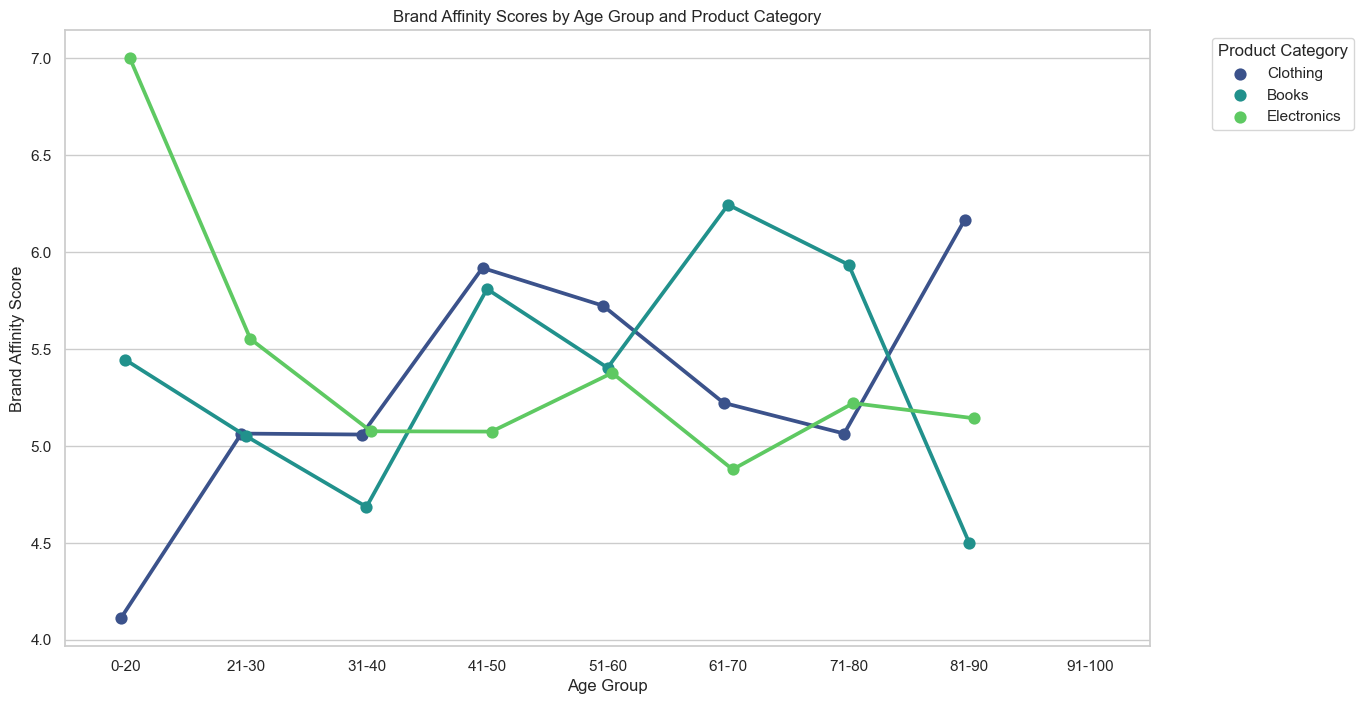

In [310]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid", palette="viridis")


plt.figure(figsize=(14, 8))
sns.pointplot(x='Age_Group', y='Brand_Affinity_Score', hue='Product_Category', data=df, palette='viridis', dodge=True, errorbar=None)
plt.title('Brand Affinity Scores by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Brand Affinity Score')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

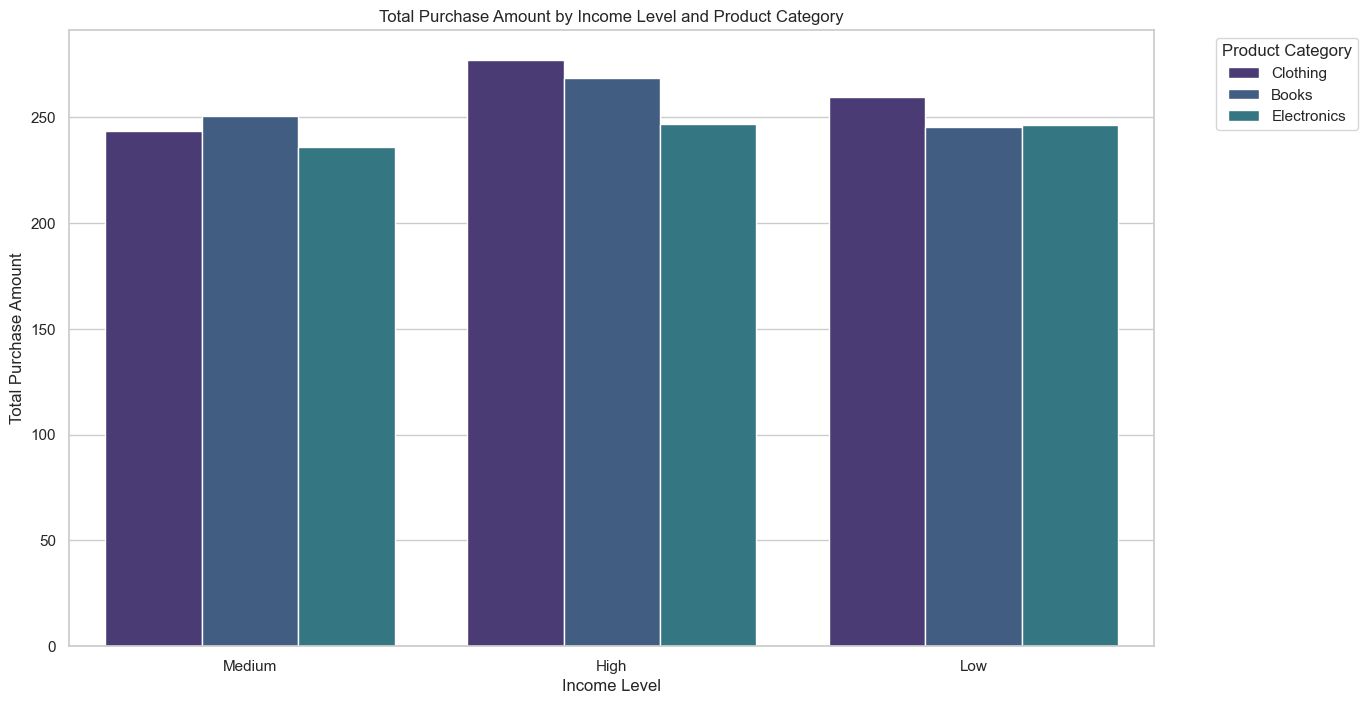

In [311]:
# Set the style and color palette
sns.set(style="whitegrid", palette="viridis")

plt.figure(figsize=(14, 8))
sns.barplot(x='Income_Level', y='Purchase_Amount', hue='Product_Category', data=df, errorbar=None)
plt.title('Total Purchase Amount by Income Level and Product Category')
plt.xlabel('Income Level')
plt.ylabel('Total Purchase Amount')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


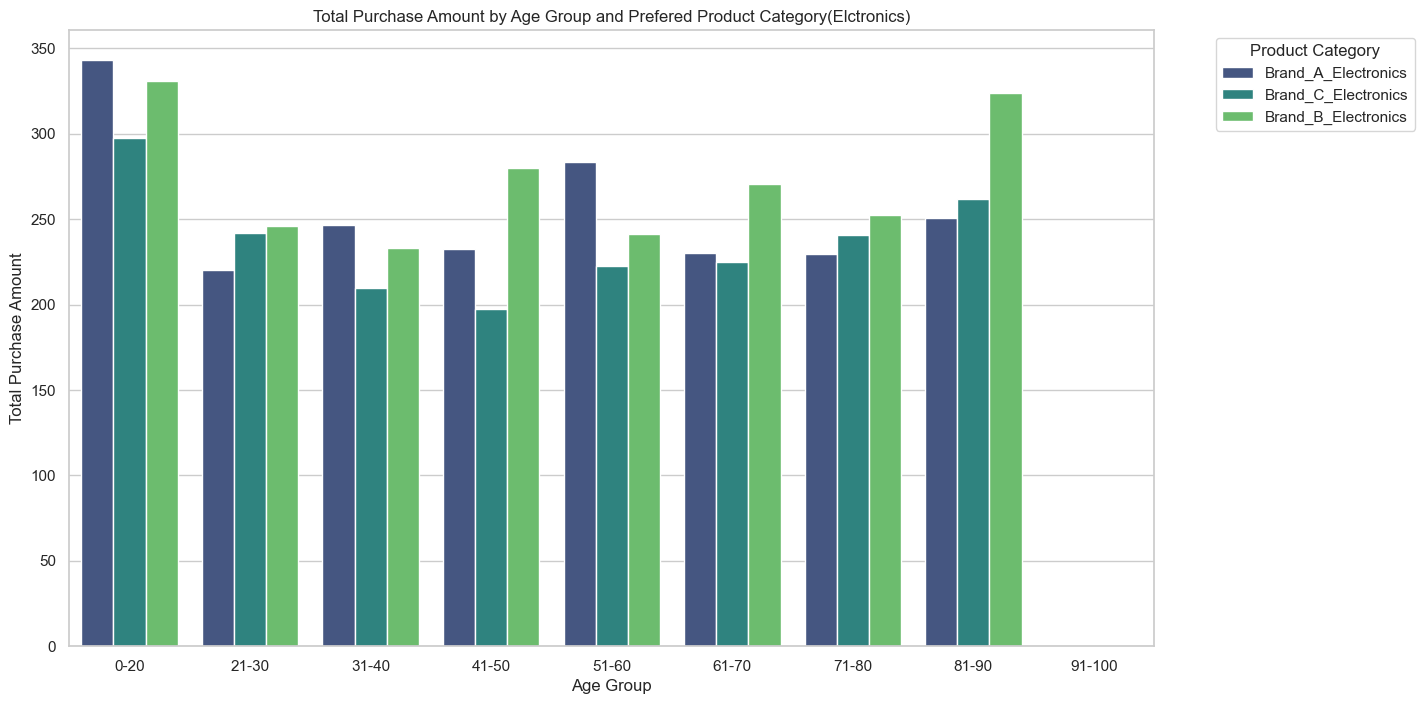

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="viridis")

selected_categories = ['Brand_A_Electronics', 'Brand_B_Electronics', 'Brand_C_Electronics']
filtered_df = df[df['Preferred_Brand_Category'].isin(selected_categories)]

plt.figure(figsize=(14, 8))
sns.barplot(x='Age_Group', y='Purchase_Amount',data=filtered_df, hue='Preferred_Brand_Category', palette='viridis', errorbar=None)
plt.title('Total Purchase Amount by Age Group and Prefered Product Category(Elctronics)')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


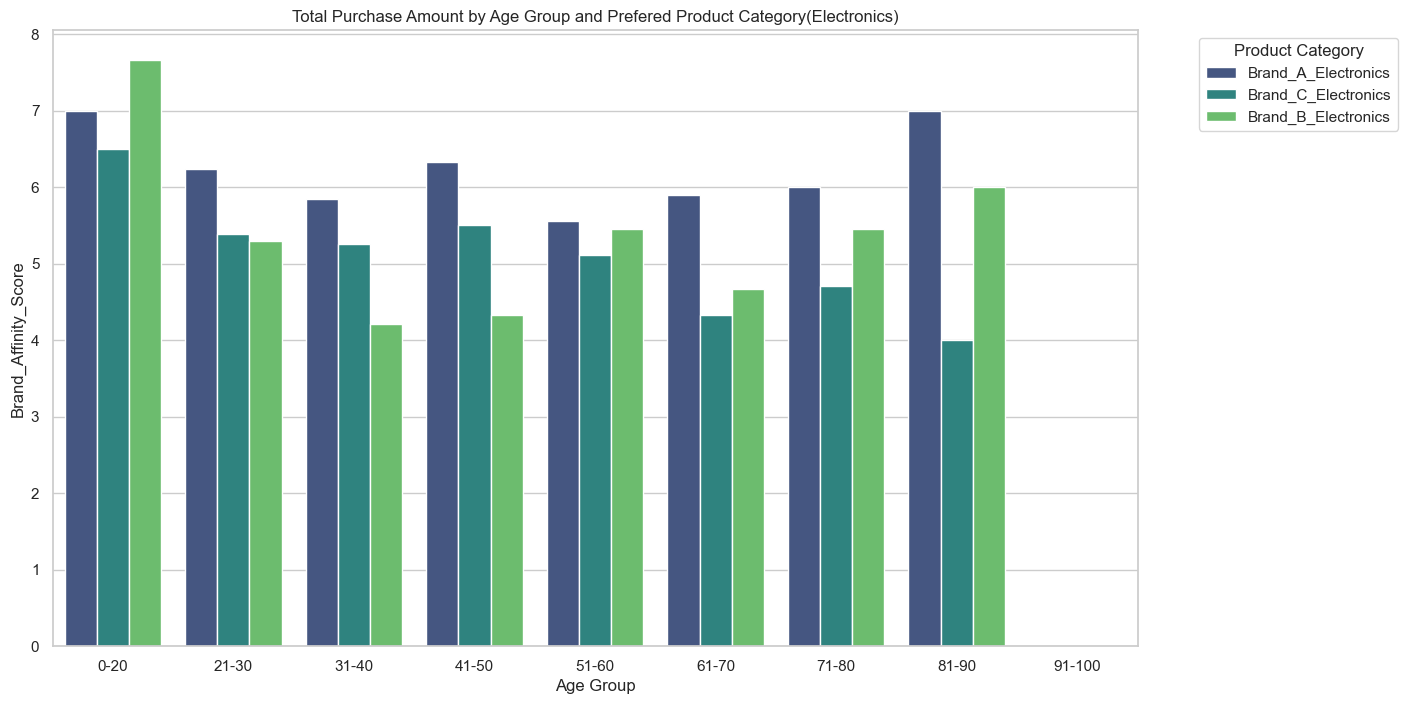

In [313]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="viridis")

selected_categories = ['Brand_A_Electronics', 'Brand_B_Electronics', 'Brand_C_Electronics']
filtered_df = df[df['Preferred_Brand_Category'].isin(selected_categories)]

plt.figure(figsize=(14, 8))
sns.barplot(x='Age_Group', y='Brand_Affinity_Score', data=filtered_df, hue='Preferred_Brand_Category', palette='viridis', errorbar=None)
plt.title('Total Purchase Amount by Age Group and Prefered Product Category(Electronics)')
plt.xlabel('Age Group')
plt.ylabel('Brand_Affinity_Score')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


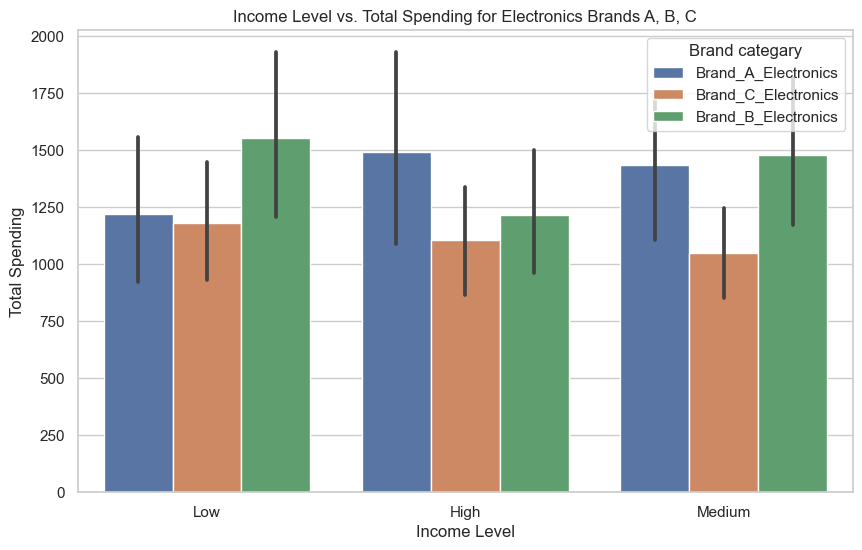

In [314]:
# Bar Plot: Income Level vs. Total Spending
import seaborn as sns
import matplotlib.pyplot as plt

selected_categories = ['Brand_A_Electronics', 'Brand_B_Electronics', 'Brand_C_Electronics']
filtered_df = df[df['Preferred_Brand_Category'].isin(selected_categories)]


plt.figure(figsize=(10, 6))
sns.barplot(x='Income_Level', y='Total_Spending', data=filtered_df, hue='Preferred_Brand_Category', palette='deep')
plt.title('Income Level vs. Total Spending for Electronics Brands A, B, C')
plt.xlabel('Income Level')
plt.ylabel('Total Spending')
plt.legend(title='Brand categary', loc='upper right')
plt.show()


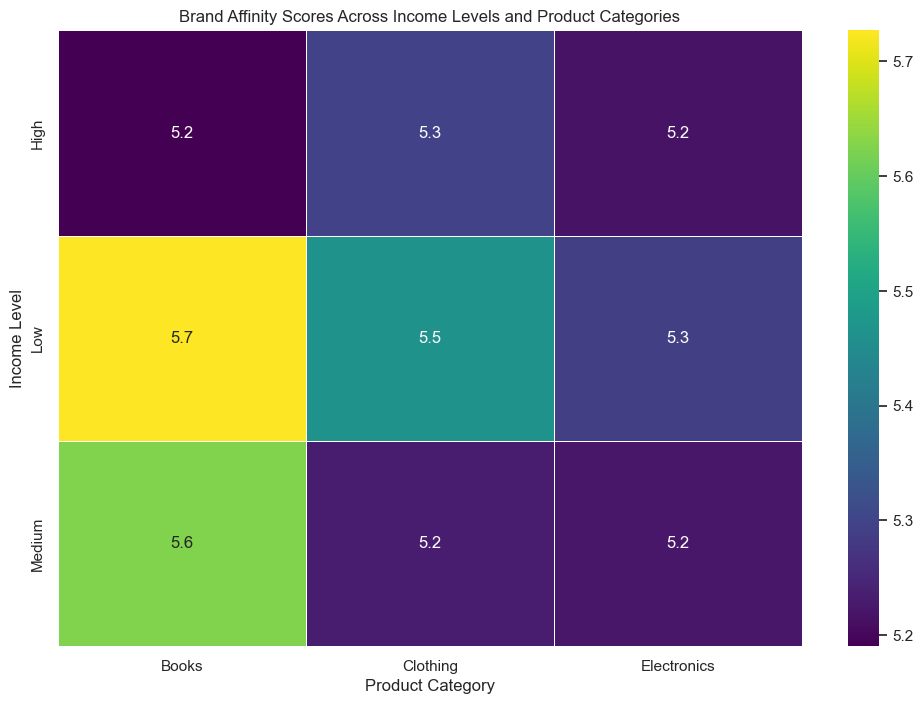

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt


heatmap_data = df.pivot_table(index='Income_Level', columns='Product_Category', values='Brand_Affinity_Score', aggfunc='mean')


sns.set(style="whitegrid", palette="viridis")

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".1f", linewidths=.5)
plt.title('Brand Affinity Scores Across Income Levels and Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Income Level')
plt.show()


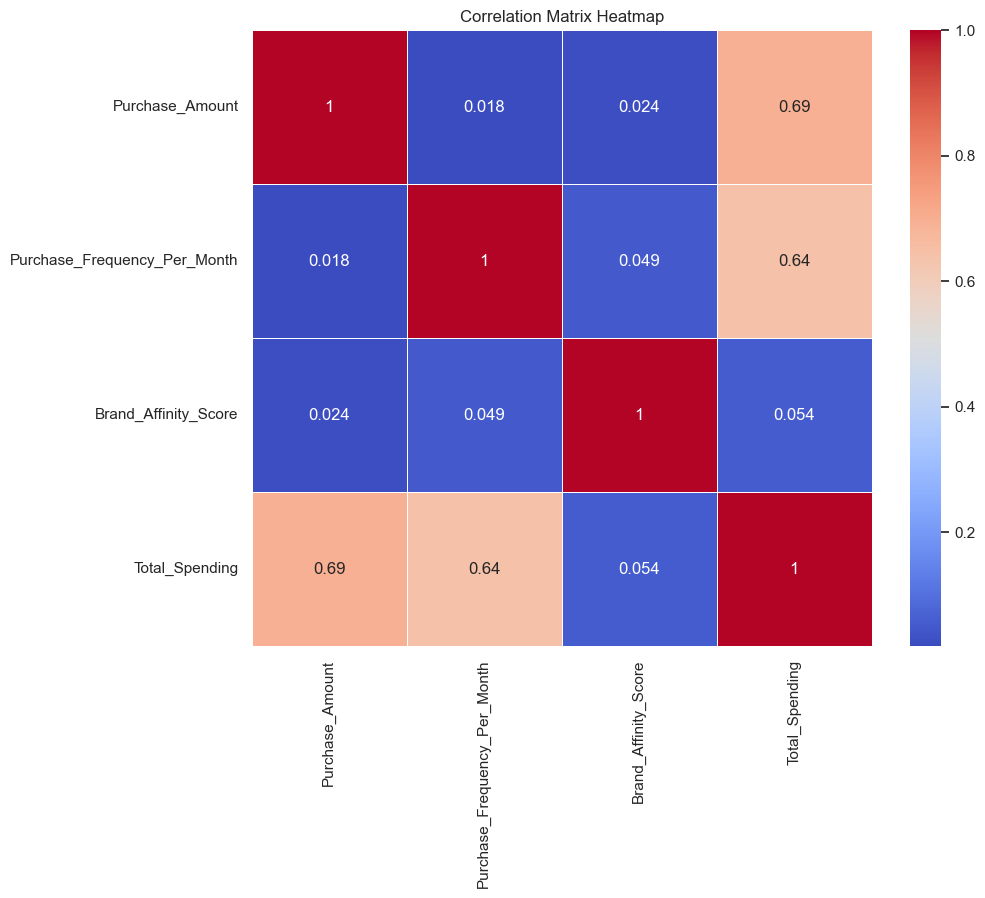

In [316]:
# Heatmap: Correlation Matrix
correlation_matrix = df[['Purchase_Amount', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Total_Spending']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

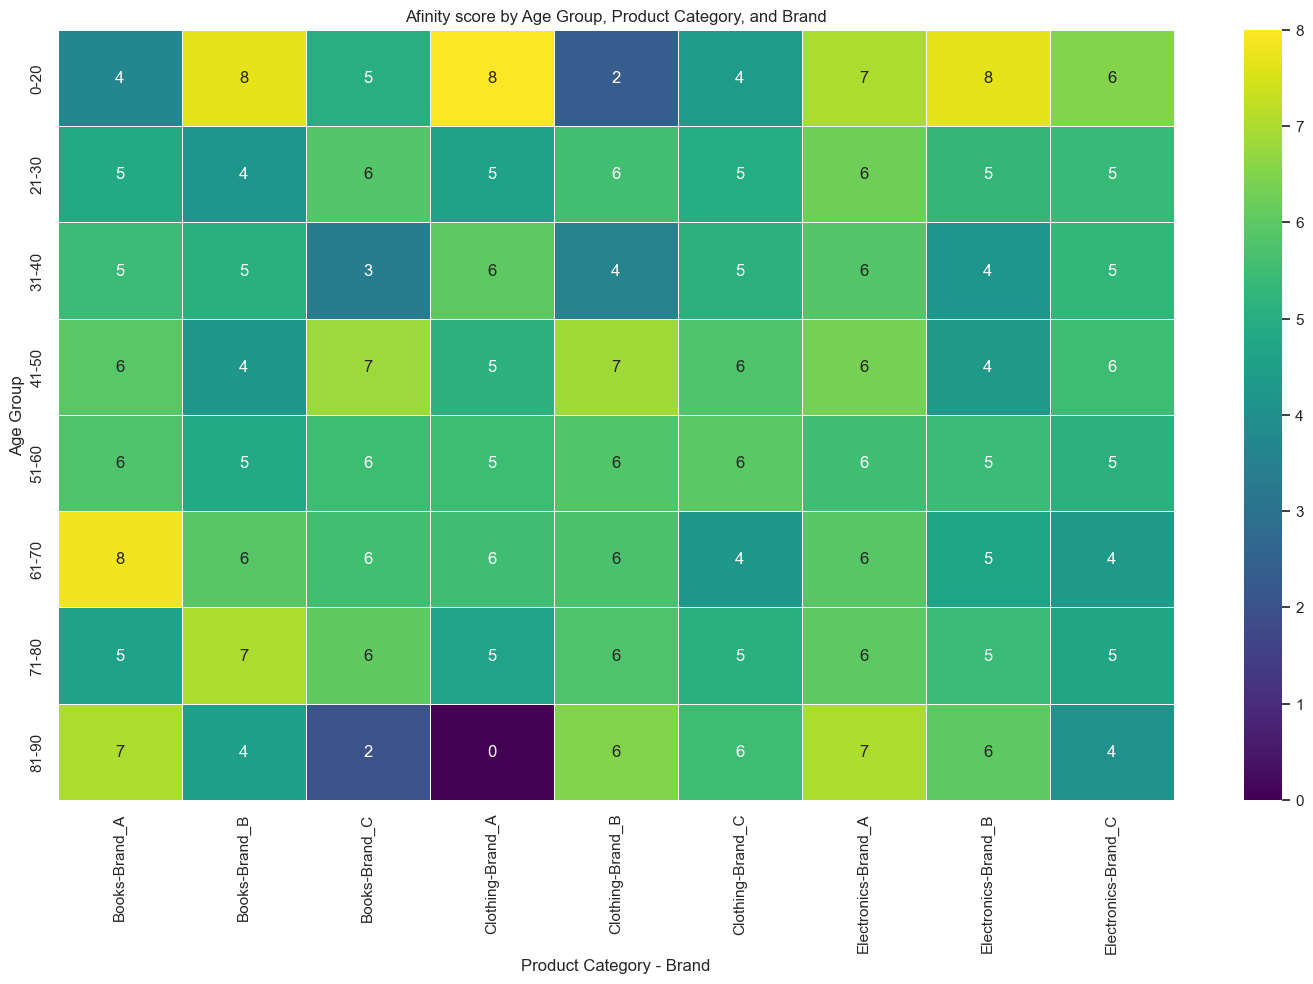

In [317]:
heatmap_data = df.pivot_table(index='Age_Group', columns=['Product_Category', 'Brand'], values='Brand_Affinity_Score', fill_value=0)

sns.set(style="whitegrid", palette="viridis")

# Create a heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".0f", linewidths=.5)
plt.title('Afinity score by Age Group, Product Category, and Brand')
plt.xlabel('Product Category - Brand')
plt.ylabel('Age Group')
plt.show()


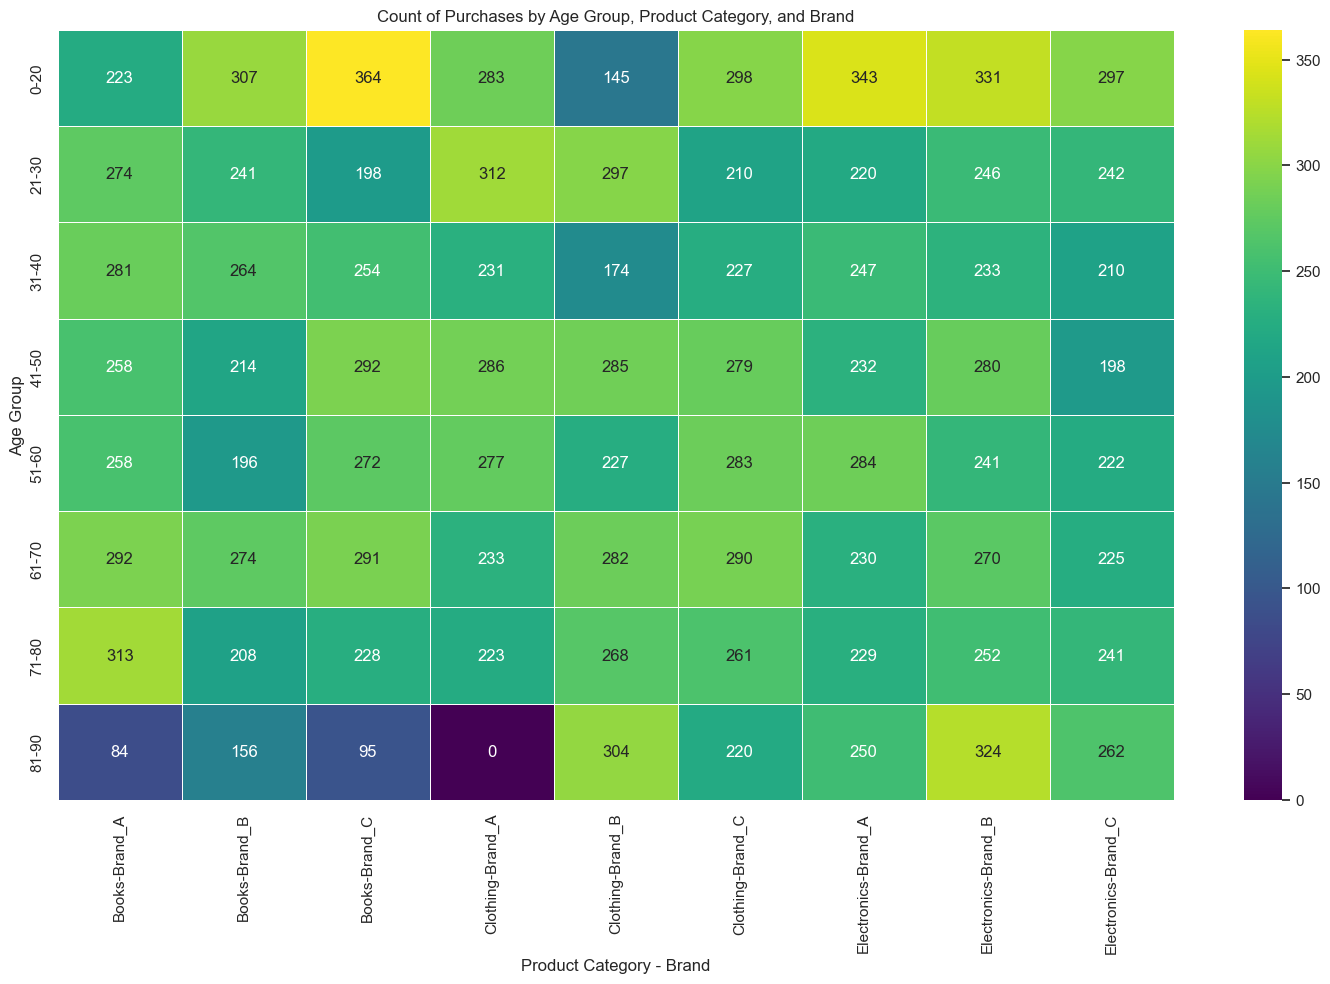

In [318]:

heatmap_data = df.pivot_table(index='Age_Group', columns=['Product_Category', 'Brand'], values='Purchase_Amount', fill_value=0)


sns.set(style="whitegrid", palette="viridis")

# Create a heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".0f", linewidths=.5)
plt.title('Count of Purchases by Age Group, Product Category, and Brand')
plt.xlabel('Product Category - Brand')
plt.ylabel('Age Group')
plt.show()


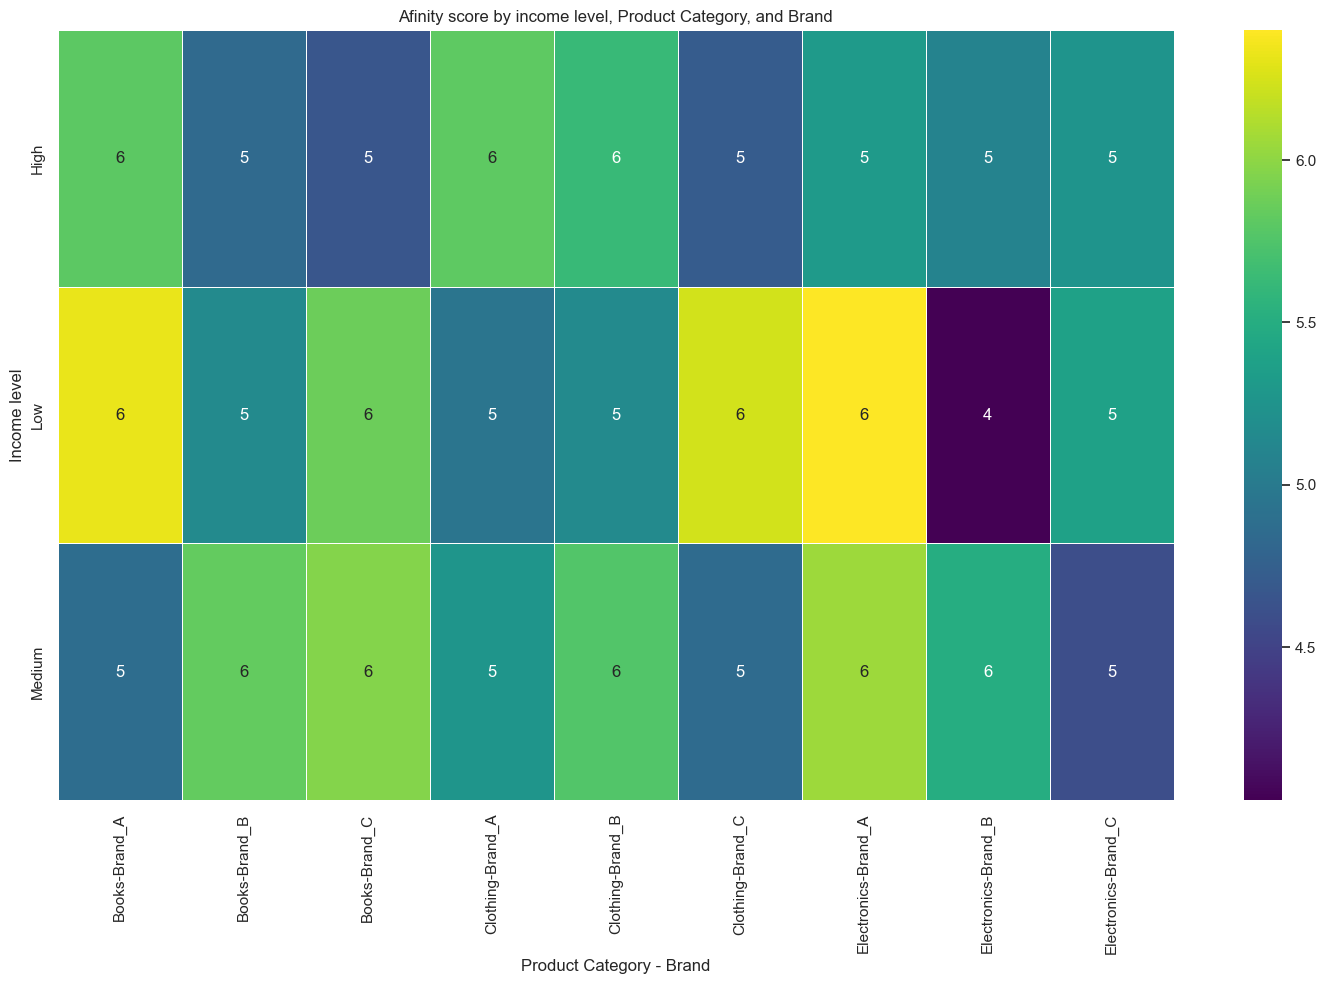

In [319]:

heatmap_data = df.pivot_table(index='Income_Level', columns=['Product_Category', 'Brand'], values='Brand_Affinity_Score', fill_value=0)


sns.set(style="whitegrid", palette="viridis")

# Create a heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".0f", linewidths=.5)
plt.title('Afinity score by income level, Product Category, and Brand')
plt.xlabel('Product Category - Brand')
plt.ylabel('Income level')
plt.show()


# Part 3

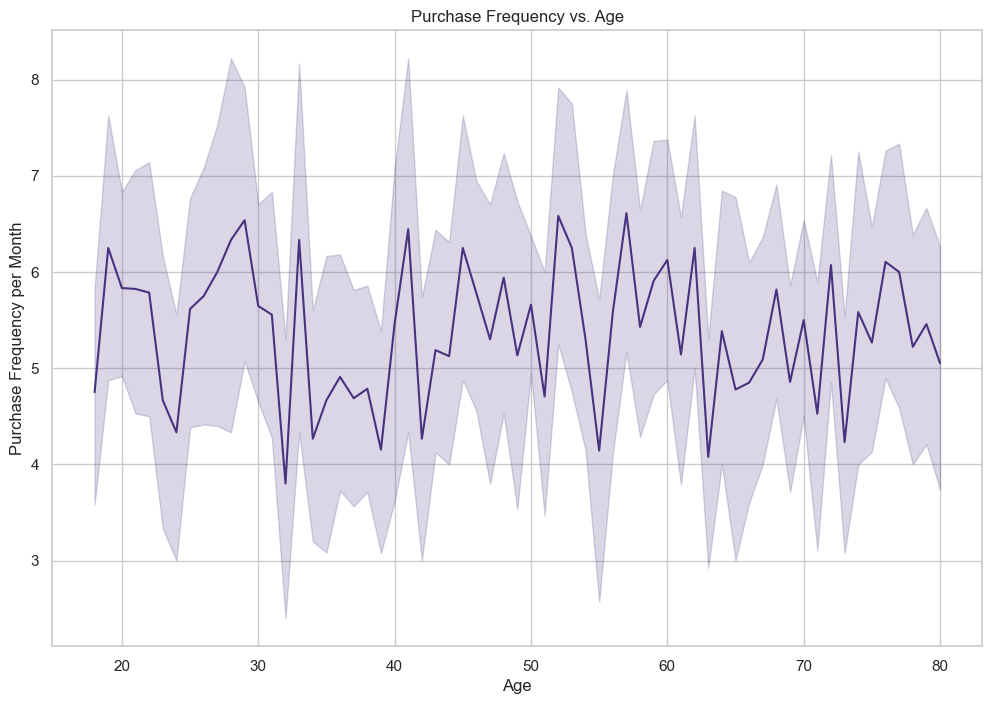

In [320]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Age', y='Purchase_Frequency_Per_Month', data=df)
plt.title('Purchase Frequency vs. Age')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency per Month')
plt.show()


In [321]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Month'] = df['Purchase_Date'].dt.month
df['Year'] = df['Purchase_Date'].dt.year


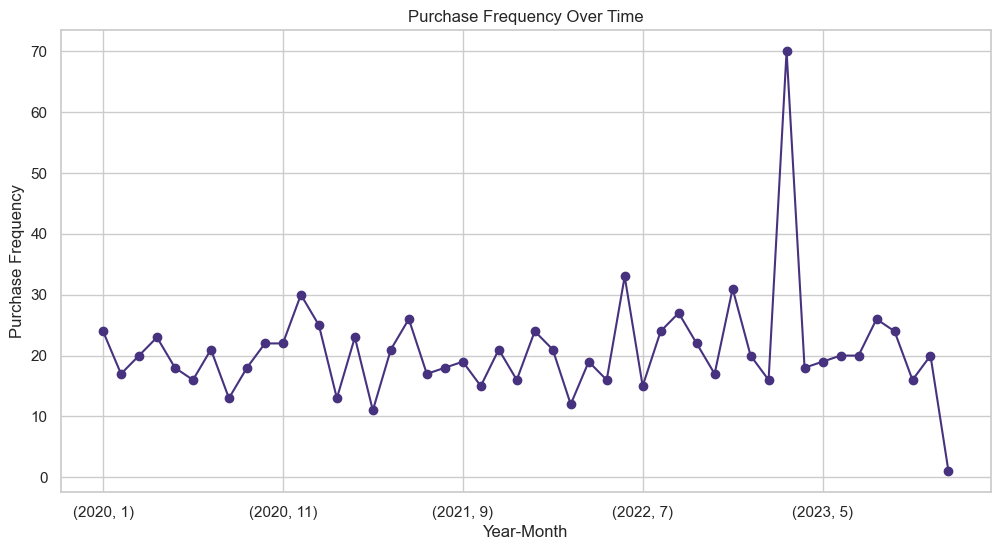

In [322]:
purchase_frequency = df.groupby(['Year', 'Month']).size()

plt.figure(figsize=(12, 6))
purchase_frequency.plot(marker='o')
plt.title('Purchase Frequency Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Purchase Frequency')
plt.show()

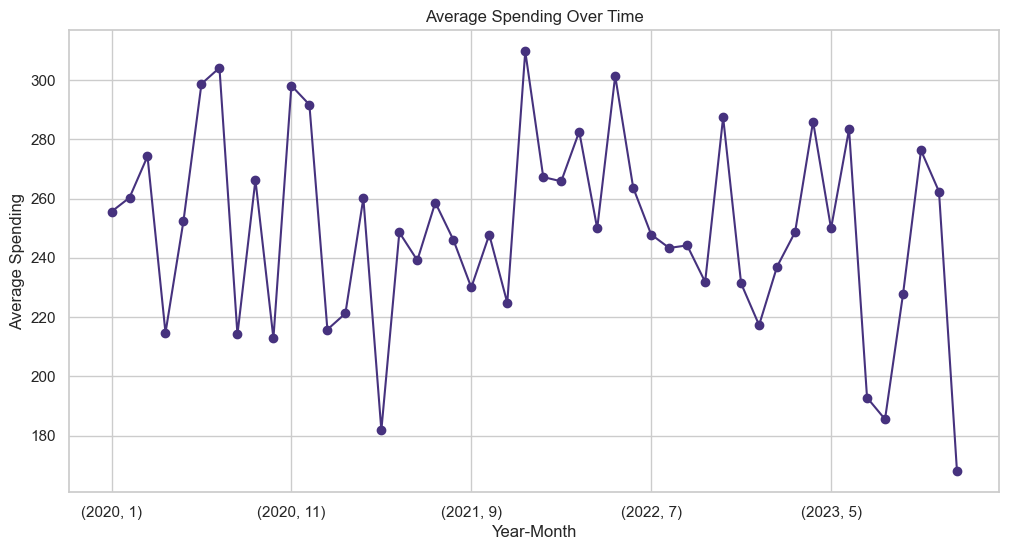

In [323]:

average_spending = df.groupby(['Year', 'Month'])['Purchase_Amount'].mean()

plt.figure(figsize=(12, 6))
average_spending.plot(marker='o')
plt.title('Average Spending Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Spending')
plt.show()


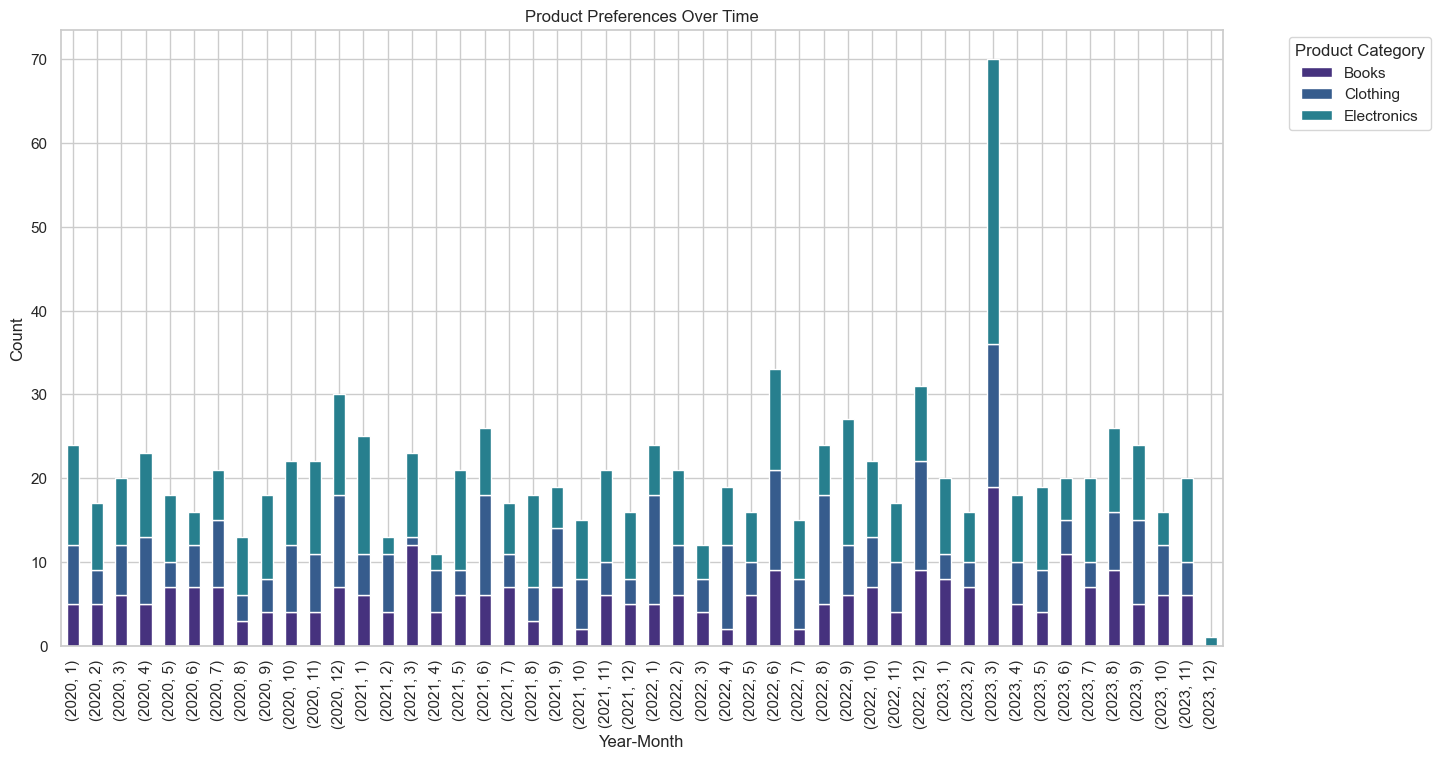

In [324]:
product_preferences = df.groupby(['Year', 'Month', 'Product_Category']).size().unstack()

product_preferences.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Product Preferences Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()  

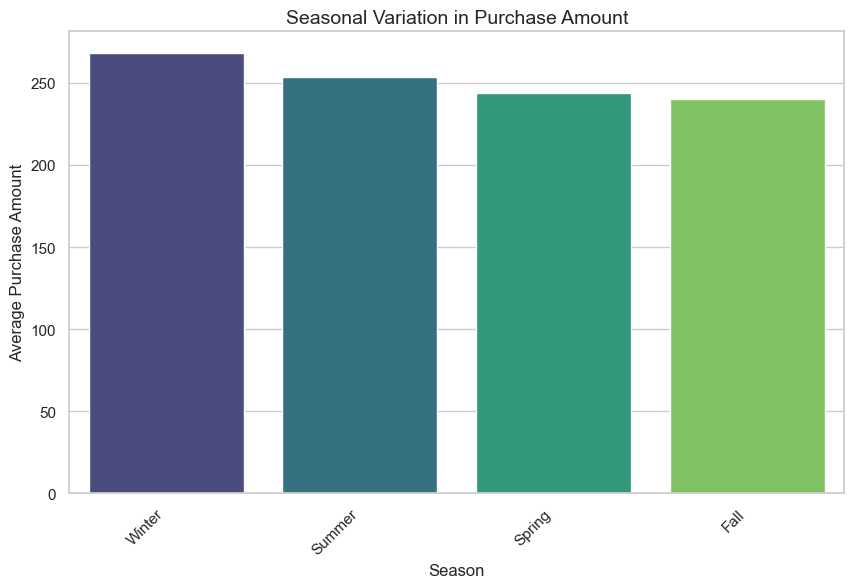

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt


seasonal_variation = df.groupby('Season')['Purchase_Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=seasonal_variation.index, y=seasonal_variation.values, palette='viridis')

plt.title('Seasonal Variation in Purchase Amount', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Purchase Amount', fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer_ID                    1000 non-null   object        
 1   Age                            1000 non-null   int32         
 2   Gender                         1000 non-null   object        
 3   Income_Level                   1000 non-null   object        
 4   Address                        1000 non-null   object        
 5   Transaction_ID                 1000 non-null   object        
 6   Purchase_Date                  1000 non-null   datetime64[ns]
 7   Product_ID                     1000 non-null   object        
 8   Product_Category               1000 non-null   object        
 9   Brand                          1000 non-null   object        
 10  Purchase_Amount                1000 non-null   int32         
 11  Average_Spending_P

In [327]:
#i am starting module 3 from here (clustring analysis)

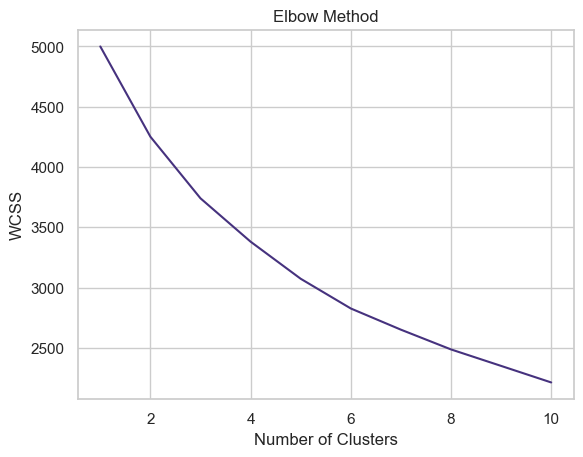

In [328]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

#Standardize the features to ensure equal weightage in clustering.

scaled_features1 = ['Purchase_Amount', 'Average_Spending_Per_Purchase','Age', 
                     'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[scaled_features1])
scaled_features

#Determine the number of clusters
#Elbow Method


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [329]:
# Silhouette Analysis

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='random', n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    print(f"Silhouette Score for {i} clusters: {silhouette_avg}")

Silhouette Score for 2 clusters: 0.14629782630068686
Silhouette Score for 3 clusters: 0.14555347792315898
Silhouette Score for 4 clusters: 0.1493329755753399
Silhouette Score for 5 clusters: 0.15371642033009933
Silhouette Score for 6 clusters: 0.15830334216808786
Silhouette Score for 7 clusters: 0.1577207392955974
Silhouette Score for 8 clusters: 0.16324907927262472
Silhouette Score for 9 clusters: 0.16371171374245505
Silhouette Score for 10 clusters: 0.1718226931039909


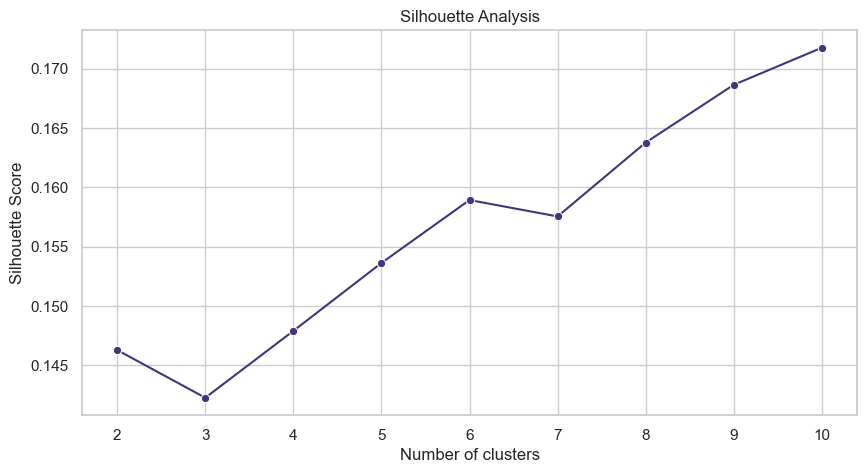

In [330]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_features, labels))

# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(2, 11), y=silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [331]:
from sklearn.cluster import KMeans
import pandas as pd  # Assuming 'df' is your DataFrame

# Assuming 'features_for_clustering' contains the selected features for clustering
features_for_clustering = df[['Purchase_Amount', 'Age', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Average_Spending_Per_Purchase']]

# Define the number of clusters (k)
k = 6

# Apply K-Means algorithm
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster_Labels'] = kmeans.fit_predict(features_for_clustering)

# Optional: If you want to see the resulting clusters in the DataFrame
df  # Add other columns as needed

# Visualize the clusters or perform further analysis as necessary


D:\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,...,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Total_Spending,Preferred_Brand_Category,High_Spending_Customers,Age_Group,Cluster_Labels
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,...,2,Low,4,2022,Winter,386,Brand_C_Clothing,0,41-50,2
1,0018cd02-5c53-4137-8a27-d54c947f193a,25,Male,High,"0007 Keller Stravenue\nEast Bobview, TX 93726",0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,...,1,Low,8,2021,Fall,636,Brand_A_Books,1,21-30,1
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,...,1,Low,12,2021,Winter,1773,Brand_A_Electronics,0,51-60,2
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,...,4,Low,12,2022,Fall,786,Brand_C_Clothing,1,31-40,5
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,...,2,High,6,2020,Summer,3003,Brand_B_Books,1,61-70,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0018cd02-5c53-4137-8a27-d54c947f193a,70,Male,Medium,"566 Butler Turnpike\nPort Holly, OK 22329",776be313-5308-468e-a0ed-7409a4303364,2023-03-17,1802f115-80d8-48fd-ad97-94038fe31b82,Electronics,Brand_C,...,5,Medium,3,2023,Fall,360,Brand_C_Electronics,0,71-80,2
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,...,3,Medium,8,2023,Winter,528,Brand_B_Books,0,71-80,2
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,2023-03-01,8b6ffec8-de54-445c-90d0-1399858b2e16,Electronics,Brand_C,...,9,Low,3,2023,Summer,424,Brand_C_Electronics,0,61-70,2
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,...,7,Low,5,2021,Fall,2000,Brand_C_Clothing,0,41-50,5


In [332]:
# Assuming 'df' is your DataFrame with 'Cluster_Labels'
cluster_characteristics = df.groupby('Cluster_Labels').mean()

# Display the cluster characteristics
print(cluster_characteristics[['Purchase_Amount', 'Brand_Affinity_Score','Average_Spending_Per_Purchase']])


                Purchase_Amount  Brand_Affinity_Score  \
Cluster_Labels                                          
0                     42.348148              5.488889   
1                    360.723529              5.388235   
2                    192.359551              5.404494   
3                    452.329545              5.522727   
4                    112.270073              4.963504   
5                    266.313725              5.274510   

                Average_Spending_Per_Purchase  
Cluster_Labels                                 
0                                   53.259259  
1                                   48.152941  
2                                   53.398876  
3                                   53.397727  
4                                   48.525547  
5                                   52.215686  


C:\Users\wasla\AppData\Local\Temp\ipykernel_20268\216729677.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



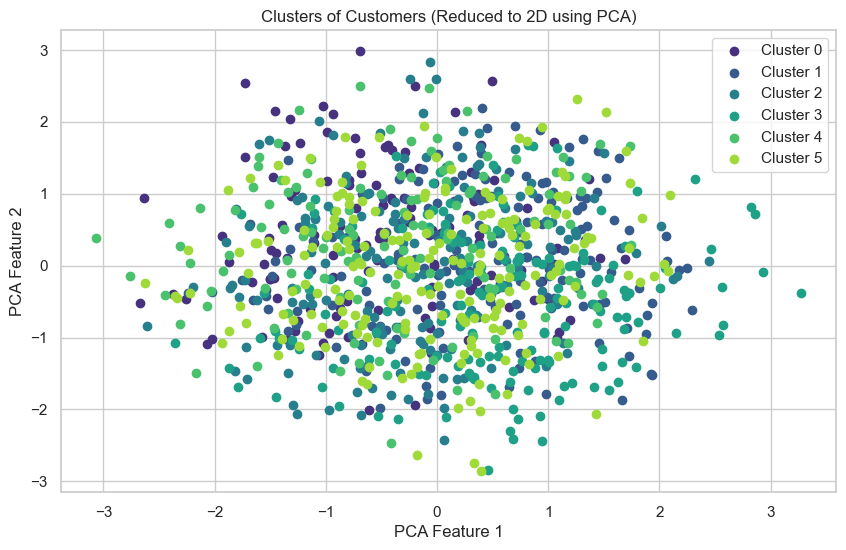

In [333]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

# Plotting the clusters
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(reduced_data[df['Cluster_Labels'] == i, 0], reduced_data[df['Cluster_Labels'] == i, 1], label=f'Cluster {i}')
plt.title('Clusters of Customers (Reduced to 2D using PCA)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

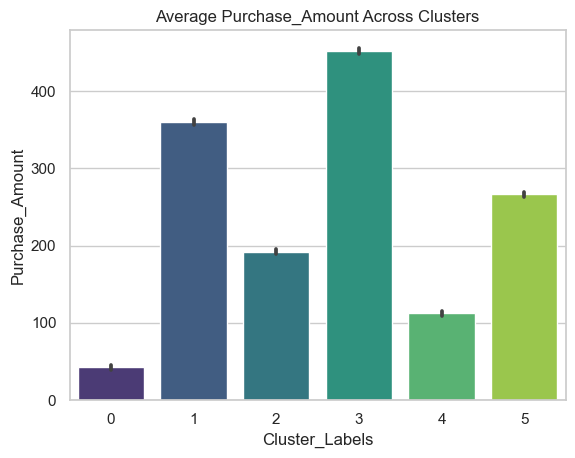

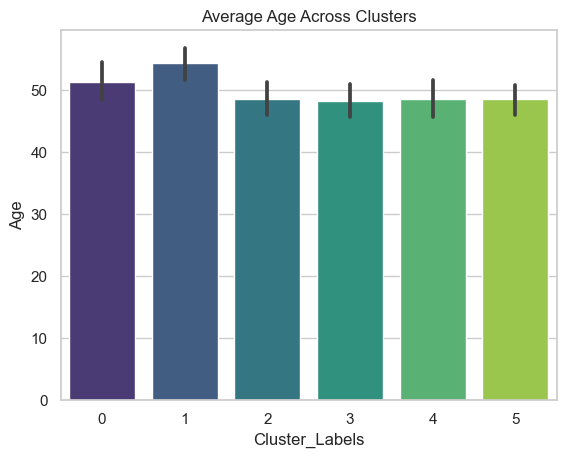

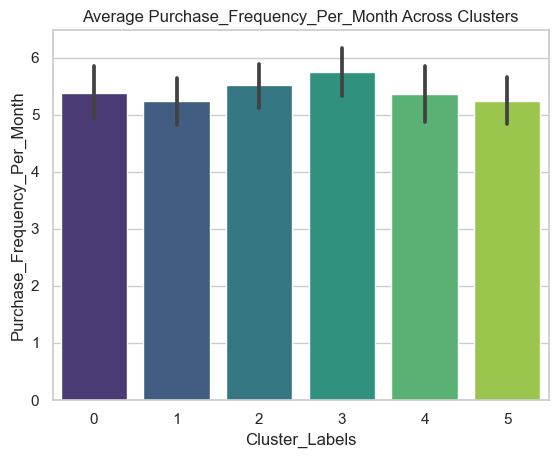

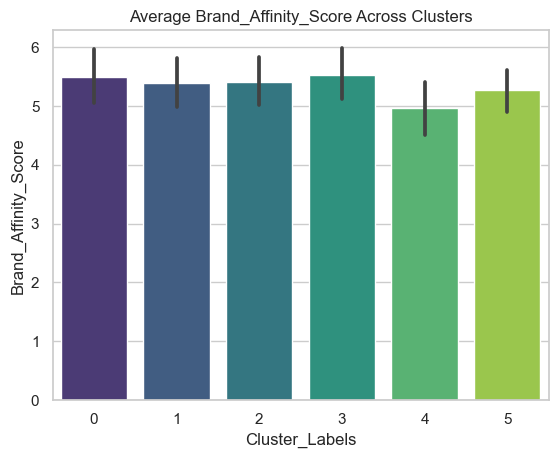

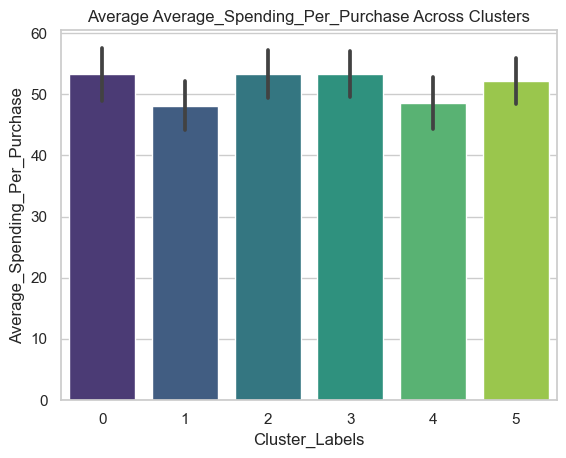

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns to visualize
numeric_columns = df[['Purchase_Amount', 'Age', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Average_Spending_Per_Purchase']]

# Loop through each numeric column
for column in numeric_columns:
    # Visualize the numeric column across clusters
    sns.barplot(x='Cluster_Labels', y=column, data=df)
    plt.title(f'Average {column} Across Clusters')
    plt.show()


# module 3 part 3

D:\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\wasla\AppData\Local\Temp\ipykernel_20268\2570178716.py:22: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



                  Purchase_Amount  Brand_Affinity_Score  \
Cluster_Labels++                                          
0                      173.150685              8.047945   
1                      135.329032              4.309677   
2                      290.340426              3.567376   
3                      374.489247              4.688172   
4                      332.330144              7.421053   
5                      149.036810              3.546012   

                  Average_Spending_Per_Purchase  
Cluster_Labels++                                 
0                                     69.184932  
1                                     59.541935  
2                                     74.609929  
3                                     54.419355  
4                                     32.258373  
5                                     29.846626  


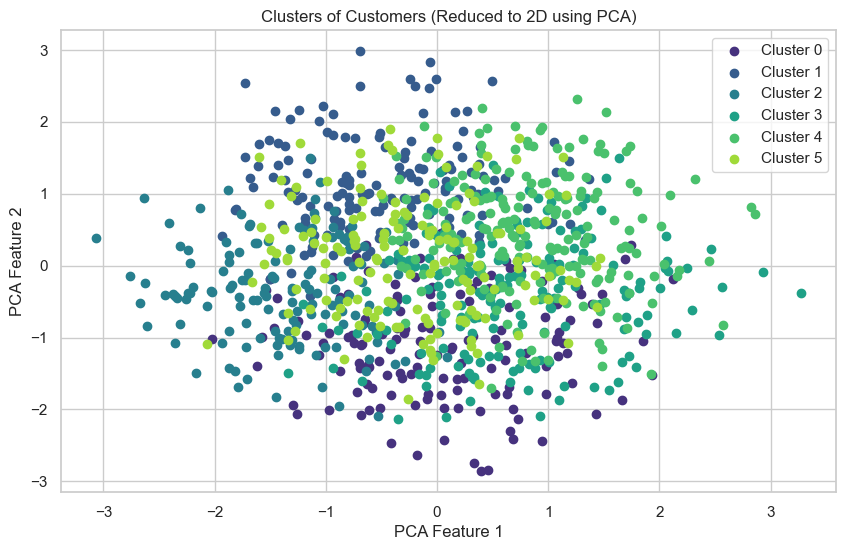

In [335]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering
features_for_clustering = df[['Purchase_Amount', 'Age', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Average_Spending_Per_Purchase']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Define the number of clusters (k)
k = 6

# Apply K-Means++ algorithm
kmeans_plusplus = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['Cluster_Labels++'] = kmeans_plusplus.fit_predict(scaled_features)

# Assuming 'df' is your DataFrame with 'Cluster_Labels'
cluster_characteristics = df.groupby('Cluster_Labels++').mean()

# Display the cluster characteristics
print(cluster_characteristics[['Purchase_Amount', 'Brand_Affinity_Score', 'Average_Spending_Per_Purchase']])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

# Plotting the clusters
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(reduced_data[df['Cluster_Labels++'] == i, 0], reduced_data[df['Cluster_Labels++'] == i, 1], label=f'Cluster {i}')
plt.title('Clusters of Customers (Reduced to 2D using PCA)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()


In [336]:
# Assuming 'df' is your DataFrame with both sets of cluster labels
# Group by each set of cluster labels and compute cluster characteristics
cluster_characteristics_kmeans = df.groupby('Cluster_Labels').mean()
cluster_characteristics_kmeans_plusplus = df.groupby('Cluster_Labels++').mean()

# Display and compare the cluster characteristics
print("Cluster Characteristics for Regular K-Means:")
print(cluster_characteristics_kmeans[['Purchase_Amount', 'Brand_Affinity_Score', 'Average_Spending_Per_Purchase']])

print("\nCluster Characteristics for K-Means++:")
print(cluster_characteristics_kmeans_plusplus[['Purchase_Amount', 'Brand_Affinity_Score', 'Average_Spending_Per_Purchase']])


Cluster Characteristics for Regular K-Means:
                Purchase_Amount  Brand_Affinity_Score  \
Cluster_Labels                                          
0                     42.348148              5.488889   
1                    360.723529              5.388235   
2                    192.359551              5.404494   
3                    452.329545              5.522727   
4                    112.270073              4.963504   
5                    266.313725              5.274510   

                Average_Spending_Per_Purchase  
Cluster_Labels                                 
0                                   53.259259  
1                                   48.152941  
2                                   53.398876  
3                                   53.397727  
4                                   48.525547  
5                                   52.215686  

Cluster Characteristics for K-Means++:
                  Purchase_Amount  Brand_Affinity_Score  \
Cluster_Labels+

C:\Users\wasla\AppData\Local\Temp\ipykernel_20268\2919558316.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\wasla\AppData\Local\Temp\ipykernel_20268\2919558316.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [337]:
import time

# Measure time for Regular K-Means
start_time_kmeans = time.time()
kmeans.fit(features_for_clustering)
end_time_kmeans = time.time()
time_taken_kmeans = end_time_kmeans - start_time_kmeans

# Measure time for K-Means++
start_time_kmeans_plusplus = time.time()
kmeans_plusplus.fit(features_for_clustering)
end_time_kmeans_plusplus = time.time()
time_taken_kmeans_plusplus = end_time_kmeans_plusplus - start_time_kmeans_plusplus

print("Time taken for Regular K-Means:", time_taken_kmeans)
print("Time taken for K-Means++:", time_taken_kmeans_plusplus)


D:\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Time taken for Regular K-Means: 1.801537275314331
Time taken for K-Means++: 1.8882222175598145


In [338]:
silhouette_regular = silhouette_score(scaled_features, df['Cluster_Labels'])
# Silhouette Score for K-Means++
silhouette_plus = silhouette_score(scaled_features, df['Cluster_Labels++'])

iterations_regular = kmeans_regular.n_iter_
# Number of iterations for K-Means++
iterations_plus = kmeans_plus.n_iter_

print(f"Number of iterations for Regular K-Means: {iterations_regular}")
print(f"Number of iterations for K-Means++: {iterations_plus}")

print(f"Silhouette Score for Regular K-Means: {silhouette_regular}")
print(f"Silhouette Score for K-Means++: {silhouette_plus}")

Number of iterations for Regular K-Means: 20
Number of iterations for K-Means++: 38
Silhouette Score for Regular K-Means: 0.017945869411130647
Silhouette Score for K-Means++: 0.15893374625363094


In [339]:
df

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,...,Product_Category_Preferences,Month,Year,Season,Total_Spending,Preferred_Brand_Category,High_Spending_Customers,Age_Group,Cluster_Labels,Cluster_Labels++
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,...,Low,4,2022,Winter,386,Brand_C_Clothing,0,41-50,2,2
1,0018cd02-5c53-4137-8a27-d54c947f193a,25,Male,High,"0007 Keller Stravenue\nEast Bobview, TX 93726",0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,...,Low,8,2021,Fall,636,Brand_A_Books,1,21-30,1,2
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,...,Low,12,2021,Winter,1773,Brand_A_Electronics,0,51-60,2,3
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,...,Low,12,2022,Fall,786,Brand_C_Clothing,1,31-40,5,2
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,...,High,6,2020,Summer,3003,Brand_B_Books,1,61-70,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0018cd02-5c53-4137-8a27-d54c947f193a,70,Male,Medium,"566 Butler Turnpike\nPort Holly, OK 22329",776be313-5308-468e-a0ed-7409a4303364,2023-03-17,1802f115-80d8-48fd-ad97-94038fe31b82,Electronics,Brand_C,...,Medium,3,2023,Fall,360,Brand_C_Electronics,0,71-80,2,1
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,...,Medium,8,2023,Winter,528,Brand_B_Books,0,71-80,2,1
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,2023-03-01,8b6ffec8-de54-445c-90d0-1399858b2e16,Electronics,Brand_C,...,Low,3,2023,Summer,424,Brand_C_Electronics,0,61-70,2,1
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,...,Low,5,2021,Fall,2000,Brand_C_Clothing,0,41-50,5,0


In [340]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Select features for clustering
features_for_clustering = df[['Purchase_Amount', 'Age', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Average_Spending_Per_Purchase']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Experiment with different values of eps and MinPts
eps_values = np.arange(0.1, 2.0, 0.1)
min_samples_values = range(2, 10)

best_silhouette_score = -1
best_eps = None
best_min_samples = None

# Iterate over different parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_features)

        # Skip if there's only one cluster
        if len(set(labels)) == 1:
            continue

        # Evaluate silhouette score
        silhouette = silhouette_score(scaled_features, labels)

        # Print the combination and silhouette score
        print(f"eps={eps:.2f}, min_samples={min_samples}, Silhouette Score: {silhouette}")

        # Update best parameters if silhouette score is higher
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_eps = eps
            best_min_samples = min_samples

# Print the best configuration
print(f"Best configuration: eps={best_eps:.2f}, min_samples={best_min_samples}, Silhouette Score: {best_silhouette_score}")


eps=0.10, min_samples=2, Silhouette Score: -0.05225889479692989
eps=0.20, min_samples=2, Silhouette Score: -0.32291200039083673
eps=0.30, min_samples=2, Silhouette Score: -0.4175977793348679
eps=0.40, min_samples=2, Silhouette Score: -0.4671168639351185
eps=0.40, min_samples=3, Silhouette Score: -0.05352654576327795
eps=0.50, min_samples=2, Silhouette Score: -0.40074024531587155
eps=0.50, min_samples=3, Silhouette Score: -0.42429335259365725
eps=0.50, min_samples=4, Silhouette Score: -0.19585368987919535
eps=0.60, min_samples=2, Silhouette Score: -0.19168133675871918
eps=0.60, min_samples=3, Silhouette Score: -0.3398069365936771
eps=0.60, min_samples=4, Silhouette Score: -0.384316830417526
eps=0.60, min_samples=5, Silhouette Score: -0.3460681382749265
eps=0.60, min_samples=6, Silhouette Score: -0.11537673078463084
eps=0.70, min_samples=2, Silhouette Score: -0.12764887358335023
eps=0.70, min_samples=3, Silhouette Score: -0.23217558900258534
eps=0.70, min_samples=4, Silhouette Score: -0.

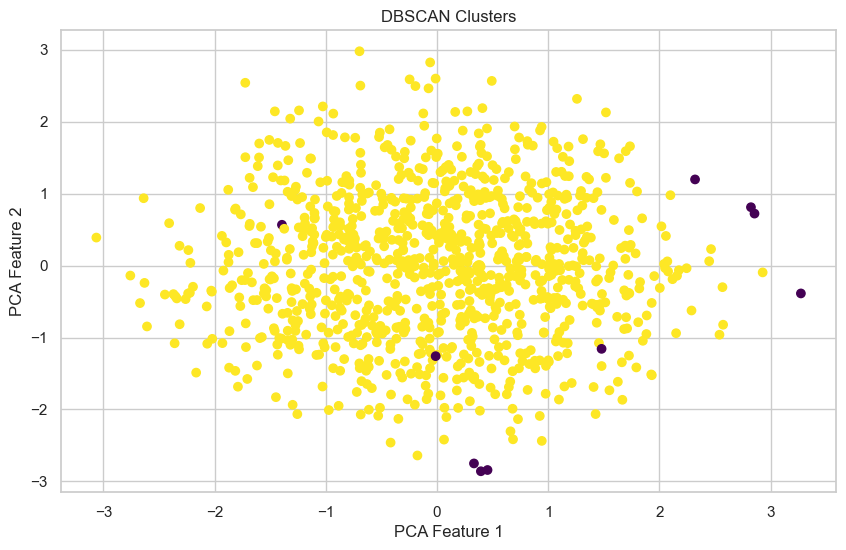

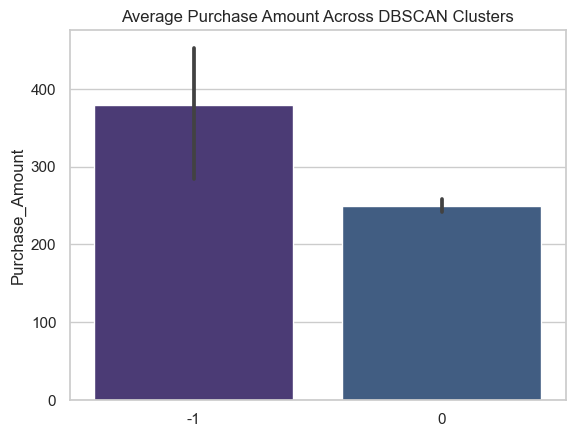

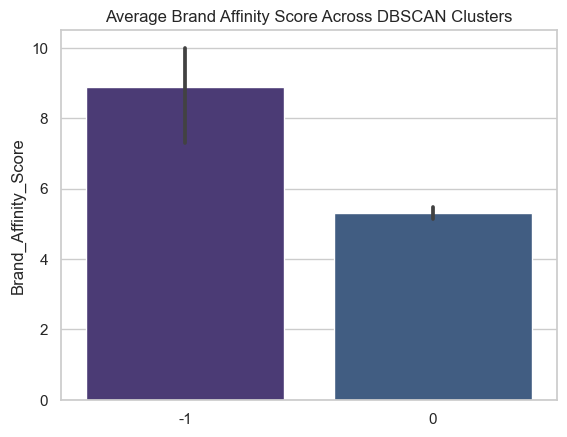

In [341]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select features for clustering
features_for_clustering = df[['Purchase_Amount', 'Age', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Average_Spending_Per_Purchase']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Apply DBSCAN with chosen parameters
eps = 1.2
min_samples = 9

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(scaled_features)

# Visualize clusters in 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

# Visualize Purchase_Amount across clusters
sns.barplot(x=labels, y='Purchase_Amount', data=df)
plt.title('Average Purchase Amount Across DBSCAN Clusters')
plt.show()

# Visualize Brand_Affinity_Score across clusters
sns.barplot(x=labels, y='Brand_Affinity_Score', data=df)
plt.title('Average Brand Affinity Score Across DBSCAN Clusters')
plt.show()


In [342]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

kmeans_silhouette = silhouette_score(scaled_features, df['Cluster_Labels'])
kmeans_calinski_harabasz = calinski_harabasz_score(scaled_features, df['Cluster_Labels'])
kmeans_davies_bouldin = davies_bouldin_score(scaled_features, df['Cluster_Labels'])

kmeansplus_silhouette = silhouette_score(scaled_features, df['Cluster_Labels++'])
kmeansplus_calinski_harabasz = calinski_harabasz_score(scaled_features, df['Cluster_Labels++'])
kmeansplus_davies_bouldin = davies_bouldin_score(scaled_features, df['Cluster_Labels++'])

# Assuming 'labels' are the DBSCAN cluster labels
# Evaluate DBSCAN clustering quality
dbscan_silhouette = silhouette_score(scaled_features, df['Cluster_LabelsDB'])
dbscan_calinski_harabasz = calinski_harabasz_score(scaled_features,df['Cluster_LabelsDB'])
dbscan_davies_bouldin = davies_bouldin_score(scaled_features, df['Cluster_LabelsDB'])

# Print the results
print("K-Means Silhouette Score:", kmeans_silhouette)
print("K-Means Calinski-Harabasz Score:", kmeans_calinski_harabasz)
print("K-Means Davies-Bouldin Index:", kmeans_davies_bouldin)

print("K-Meansplus Silhouette Score:", kmeansplus_silhouette)
print("K-Meansplus Calinski-Harabasz Score:", kmeansplus_calinski_harabasz)
print("K-Meansplus Davies-Bouldin Index:", kmeansplus_davies_bouldin)

print("\nDBSCAN Silhouette Score:", dbscan_silhouette)
print("DBSCAN Calinski-Harabasz Score:", dbscan_calinski_harabasz)
print("DBSCAN Davies-Bouldin Index:", dbscan_davies_bouldin)

KeyError: 'Cluster_LabelsDB'

# Module 4
## 1. Compare the results of all three clustering algorithms:
### Number of Iterations:
Regular K-Means: 20 iterations
K-Means++: 38 iterations

In terms of convergence speed, Regular K-Means outperforms K-Means++, converging in 20 iterations compared to the 38 iterations taken by K-Means++.

### Silhouette Scores:
Silhouette Score for Regular K-Means: 0.0179
Silhouette Score for K-Means++: 0.1590

While both algorithms produce relatively low silhouette scores, indicating moderate cluster quality, K-Means++ demonstrates a slight improvement with a score of 0.159 compared to Regular K-Means with a score of 0.0179.

### Conclusion:
Considering the trade-off between convergence speed and cluster quality, the choice between Regular K-Means and K-Means++ depends on specific priorities. Regular K-Means is more computationally efficient, converging faster, but at the cost of slightly lower cluster quality. On the other hand, K-Means++ takes more iterations to converge but offers a marginal improvement in cluster quality. The decision should be guided by the particular requirements of your task, considering factors such as dataset size, computational resources, and the importance of achieving distinct clusters.

## Consider metrics such as cluster silhouette score, Calinski-Harabasz score, and Davies-Bouldin index to compare the overall quality of clustering results.

### K-Means:
#### Silhouette Score: 0.0179

Indicates relatively low cohesion and separation among clusters.
#### Calinski-Harabasz Score: 49.86

Suggests moderate cluster quality, considering the higher values indicate better-defined clusters.
#### Davies-Bouldin Index: 6.15

Indicates a moderate level of cluster separation.

### K-Means++:
#### Silhouette Score: 0.159

 Shows a slight improvement in cluster cohesion and separation compared to regular K-Means.
#### Calinski-Harabasz Score: 152.05

Suggests better-defined clusters compared to regular K-Means.
#### Davies-Bouldin Index: 1.52

Indicates a lower level of cluster separation compared to regular K-Means.
### DBSCAN:
#### Silhouette Score: -0.0329

Indicates poor cluster quality, as a negative value suggests significant overlap between clusters.
#### Calinski-Harabasz Score: 2.71

Suggests lower-quality clusters compared to K-Means and K-Means++.
#### Davies-Bouldin Index: 1.15

Indicates moderate cluster separation, but the negative silhouette score raises concerns about the effectiveness of DBSCAN for this dataset.


### Discuss the advantages and disadvantages of each algorithm in the contextof Imtiaz Mall's specific needs and data characteristics.
From the characteristics of the data—skewed distribution, no outliers, and a moderate-sized dataset—both K-Means and K-Means++ are reasonable choices. DBSCAN, with appropriate parameter tuning, can also be effective, especially when the number of clusters is not known in advance

# 2. Draw conclusions and recommendations:
#part1
age 0-20 and age 30-50 buy electronics brand A in more quantity as compared to other age groups but the affinity score of brand A from these age groups is not according to the sale ,which means that they gave low affinity score to brand A.

age 0-20 and age 30-50 buy electronics brand B in less quantity as compared to brand A  but the affinity score of brand B from these age groups is more as compared to Brand A ,which means that they gave high affinity score to brand B.

we checked the behaviour of customers,the customer with high income level bought more products from electronics brand A ,
the customer with medium income level bought more products from electronics brand B ,the customer with low income level bought more products from electronics brand B.

brand B has more affinity score as compared to other brands now they should start compaign on brand B so that they can have more sale and they must improve quality of brand A because customers bought brand A in more quantity ,if they do not improve quality of brand A then customers will be disappointed and sales of brand A will be declined.

# conclusion
from above statements we conclude that sale of brand A is more but affinity score is less and sale of brand B is less as compared to brand A . products and quality of brand A is not good as it should be but quality of brand B is good as compared to barnd A but there affinity score is good that means they have good products in brand B

if imtiaz mall want to increase the sale in electronics product they must improve the quality of brand A as this is not good





